# Main notebook
This notebook is able to reproduce all experiments and plots described in the reproducibility paper.

### Summary:
* ##### [Reproducing models and data for main claims.](#Reproducing-models-and-data-for-main-claims)
* ##### [Reproducing models and data for visualization.](#Reproducing-models-and-data-for-visualization)
* ##### [Reproducing original plots.](#Reproducing-original-plots)
* ##### Additional visualization

In [32]:
import torch
import os

%load_ext autoreload
device = "cuda" if torch.cuda.is_available() else "cpu"
IFLOW_FOLDER = 'iFlow_experiment'
IVAE_FOLDER = 'iVAE_experiment'
NUMBER_OF_SEEDS_MAIN = 2
NUMBER_OF_SEEDS_VISUALIZATION = 5


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reproducing models and data for main claims
In the cell below the hyperparameters from theh iFlow paper are used to reproduce the original results. For accurate reproduction you need to run it on a gpu, since the cpu you will get different results.  

For information about other paramaters consult the main.py in the iFlow folder by excuting `!python iFlow/main.py -h` in a code cell.

In [ ]:
cuda_flag = '-c' if device == "cuda" else ""

for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {IFLOW_FOLDER} \
            {cuda_flag} \
            '-s' '1' 

for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {IVAE_FOLDER} \
            {cuda_flag} \
            '-s' '1' 


Namespace(anneal=False, batch_size=64, cuda=False, data_args='1000_40_5_5_3_1_gauss_xtanh_u_f', depth=3, epochs=20, experiments_folder='iFlow_experiment', file=None, flow_length=10, flow_type='RQNSF_AG', gpu_id='0', hidden_dim=50, i_what='iFlow', latent_dim=None, log_freq=25, lr=0.001, lr_drop_factor=0.25, lr_patience=10, max_iter=None, nat_param_act='Softplus', no_log=False, num_bins=8, preload=False, seed=1)
training on cpu
data loaded on cpu
setup time: 0.08899188041687012s
Beginning training for exp: 1
.. checkpoint at iteration 0 ..
^C
Traceback (most recent call last):
  File "main.py", line 182, in <module>
    optimizer.step()
  File "/home/hidde/miniconda3/envs/iFlow/lib/python3.7/site-packages/torch/autograd/grad_mode.py", line 15, in decorate_context
    return func(*args, **kwargs)
  File "/home/hidde/miniconda3/envs/iFlow/lib/python3.7/site-packages/torch/optim/adam.py", line 100, in step
    exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)
KeyboardInterrupt
Na

# Reproducing models and data for visualization
In the cell below the data and models are produced used for the visualiation of the latent dimensions. This means that data and the latent dimension are both 2 instead of 5 as this enables us to plot on a 2D graph.

In [ ]:
cuda_flag = '-c' if device == "cuda" else ""

for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'iFlow/main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {IFLOW_FOLDER} \
            {cuda_flag} \
            '-s' '1' 

for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'iFlow/main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' '-ft' 'RQNSF_AG' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {IVAE_FOLDER} \
            '-s' '1' 

# Reproducing original plots


['intermdiate_results/iFlow_experiment_mcc.npy', 'intermdiate_results/iVAE_experiment_mcc.npy']
[None]
[2. 1.]
[2. 1.]


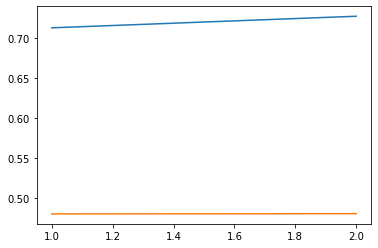

In [31]:
import importlib
%autoreload

from plot_mcc import plot_experiments

SAVE_INTERMEDIATE_RESULTS_FOLDER= "intermdiate_results"
RESULT_NAMES = [IFLOW_FOLDER + "_mcc.npy", IVAE_FOLDER + "_mcc.npy"]
LOAD_FILE_IF_POSSIBLE=True

if not os.path.exists(SAVE_INTERMEDIATE_RESULTS_FOLDER):
    os.makedirs(SAVE_INTERMEDIATE_RESULTS_FOLDER)

result_files = [SAVE_INTERMEDIATE_RESULTS_FOLDER + "/" + name for name in RESULT_NAMES]
load_files = [file if os.path.isfile(file) else None for file in result_files]

if LOAD_FILE_IF_POSSIBLE and all(load_files):
    dirs = [None]
else:
    dirs = [IFLOW_FOLDER, IVAE_FOLDER]
    load_files = [None]

    
print(load_files)
print(dirs)

args = {"dirs":dirs,
        "load_files":load_files,
        "device":device,
         "n_samples":50,
         "save_files":result_files
          }


plot_experiments(args)


In [ ]:
import plot_correlation


In [ ]:
import plot_dataset_difficulty